In [1]:
import numpy as np

y_true = np.load("test_labels.npy")
mobilenet_probs = np.load("mobilenet_probs.npy")
mobilenet_preds = np.load("mobilenet_preds.npy")

resnet_probs = np.load("resnet_probs.npy")
resnet_preds = np.load("resnet_preds.npy")


In [3]:
from scipy.stats import wilcoxon

stat, p = wilcoxon(mobilenet_probs, resnet_probs)
print(f"Wilcoxon Test → stat={stat:.3f}, p-value={p:.4f}")


Wilcoxon Test → stat=11655.000, p-value=0.0069


In [5]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [7]:
from sklearn.metrics import roc_auc_score

auc1 = roc_auc_score(y_true, mobilenet_probs)
auc2 = roc_auc_score(y_true, resnet_probs)
print(f"AUCs → MobileNetV2: {auc1:.4f}, ResNet50: {auc2:.4f}")


AUCs → MobileNetV2: 0.9596, ResNet50: 0.7172


In [9]:
from statsmodels.stats.contingency_tables import mcnemar
from sklearn.metrics import confusion_matrix

# Build contingency table for disagreements
both_correct = np.sum((mobilenet_preds == y_true) & (resnet_preds == y_true))
mobilenet_only = np.sum((mobilenet_preds == y_true) & (resnet_preds != y_true))
resnet_only = np.sum((mobilenet_preds != y_true) & (resnet_preds == y_true))
both_wrong = np.sum((mobilenet_preds != y_true) & (resnet_preds != y_true))

table = [[both_correct + both_wrong, mobilenet_only],
         [resnet_only, 0]]

result = mcnemar(table, exact=False)
print(f"McNemar's Test → chi2={result.statistic:.3f}, p-value={result.pvalue:.4f}")


McNemar's Test → chi2=28.896, p-value=0.0000


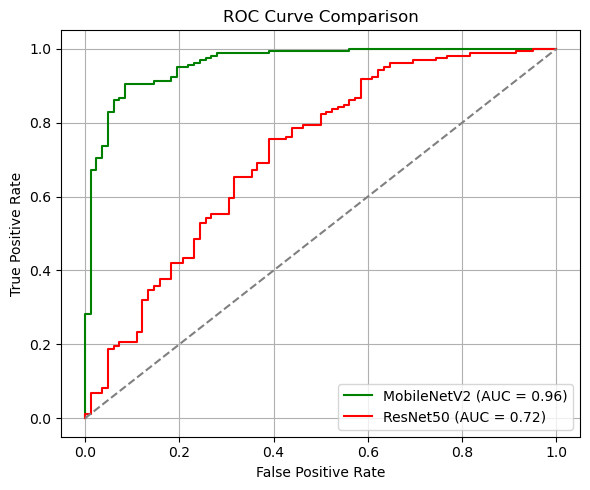

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curves
fpr1, tpr1, _ = roc_curve(y_true, mobilenet_probs)
fpr2, tpr2, _ = roc_curve(y_true, resnet_probs)

plt.figure(figsize=(6, 5))
plt.plot(fpr1, tpr1, label=f'MobileNetV2 (AUC = {auc(fpr1, tpr1):.2f})', color='green')
plt.plot(fpr2, tpr2, label=f'ResNet50 (AUC = {auc(fpr2, tpr2):.2f})', color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


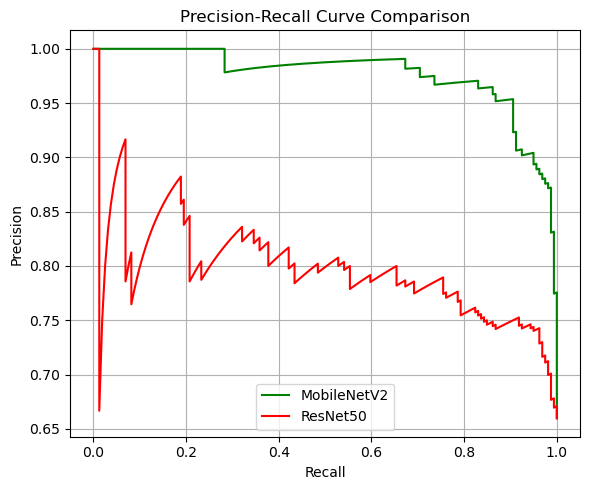

In [13]:
from sklearn.metrics import precision_recall_curve

precision1, recall1, _ = precision_recall_curve(y_true, mobilenet_probs)
precision2, recall2, _ = precision_recall_curve(y_true, resnet_probs)

plt.figure(figsize=(6, 5))
plt.plot(recall1, precision1, label='MobileNetV2', color='green')
plt.plot(recall2, precision2, label='ResNet50', color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


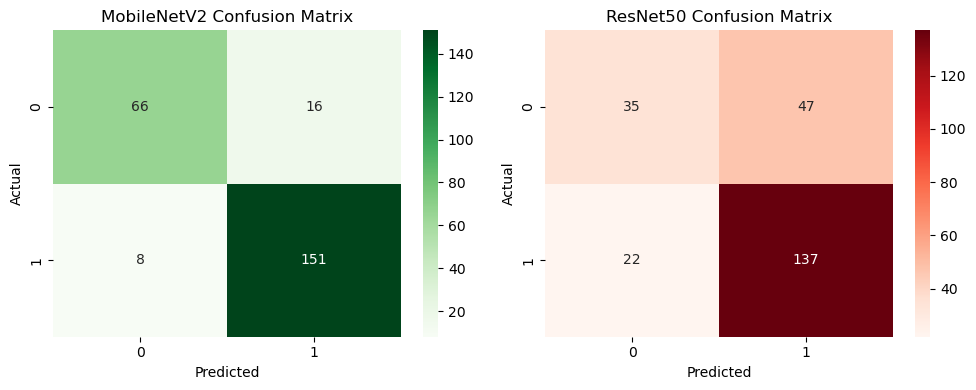

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm1 = confusion_matrix(y_true, mobilenet_preds)
cm2 = confusion_matrix(y_true, resnet_preds)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Greens', ax=axes[0])
axes[0].set_title('MobileNetV2 Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm2, annot=True, fmt='d', cmap='Reds', ax=axes[1])
axes[1].set_title('ResNet50 Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


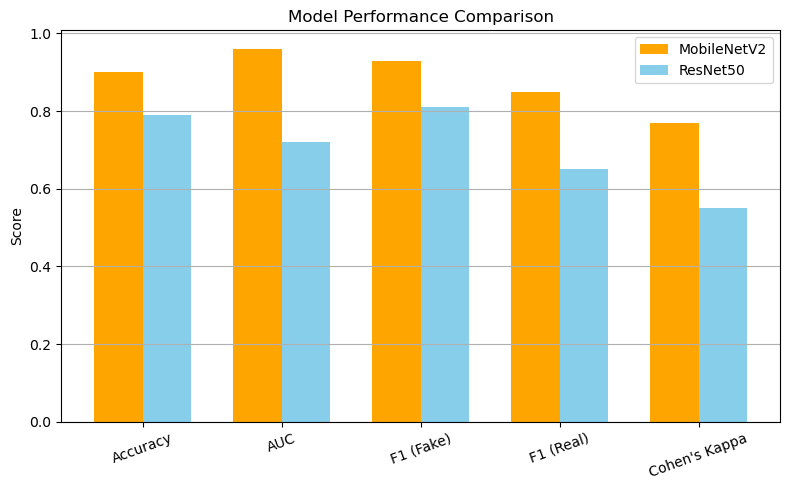

In [23]:
import numpy as np

metrics = ['Accuracy', 'AUC', "F1 (Fake)", "F1 (Real)", "Cohen's Kappa"]
mobilenet_values = [0.90, 0.96, 0.93, 0.85, 0.77]
resnet_values =    [0.79, 0.72, 0.81, 0.65, 0.55]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, mobilenet_values, width, label='MobileNetV2', color='orange')
plt.bar(x + width/2, resnet_values, width, label='ResNet50', color='skyblue')
plt.xticks(x, metrics, rotation=20)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()
